<a href="https://colab.research.google.com/github/msaad1311/Machine-Translation-English-to-French/blob/master/Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import collections
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,Flatten
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
# import tensorflow as tf
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
with open('/content/small_vocab_en', "r") as f:
        data = f.read()

english_sentences = data.split('\n')

with open('/content/small_vocab_fr', "r") as f:
        data = f.read()

french_sentences = data.split('\n')

In [7]:
len(english_sentences),len(french_sentences)

(137861, 137861)

In [8]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


In [9]:
english_sentences=english_sentences[0:10000]
french_sentences=french_sentences[0:10000]
len(english_sentences),len(french_sentences)

(10000, 10000)

In [26]:
en_sentence =[]
fr_sentence=[]
for i in english_sentences:
    eng = 'SOS '+i+' EOS'
    en_sentence.append(eng)
for j in french_sentences:
    fr = 'SOS '+j+' EOS'
    fr_sentence.append(fr)
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, en_sentence[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, fr_sentence[sample_i]))
print()
print(len(en_sentence),len(fr_sentence))

small_vocab_en Line 1:  SOS new jersey is sometimes quiet during autumn , and it is snowy in april . EOS
small_vocab_fr Line 1:  SOS new jersey est parfois calme pendant l' automne , et il est neigeux en avril . EOS
small_vocab_en Line 2:  SOS the united states is usually chilly during july , and it is usually freezing in november . EOS
small_vocab_fr Line 2:  SOS les états-unis est généralement froid en juillet , et il gèle habituellement en novembre . EOS

10000 10000


In [27]:
token_en = Tokenizer()
eng = token_en.fit_on_texts(en_sentence)
eng = token_en.texts_to_sequences(en_sentence)
print(len(eng))

10000


In [28]:
token_fr = Tokenizer()
fr = token_fr.fit_on_texts(fr_sentence)
fr = token_fr.texts_to_sequences(fr_sentence)
print(len(fr))

10000


In [35]:
maxi_en= len(max(eng,key=len))
print(maxi_en)

17


In [36]:
maxi_fr = len(max(fr,key=len))
print(maxi_fr)

22


In [37]:
en_pad = pad_sequences(eng,maxlen=maxi_fr,truncating='post',padding='post')
print(en_pad[0:10])

[[ 2 19 21  1 11 33  6 47  9  5  1 52  4 55  3  0  0  0  0  0  0  0]
 [ 2  7 24 25  1 10 56  6 42  9  5  1 10 70  4 50  3  0  0  0  0  0]
 [ 2 22  1 10 33  6 60  9  5  1 10 54  4 35  3  0  0  0  0  0  0  0]
 [ 2  7 24 25  1 11 61  6 35  9  5  1 62  4 34  3  0  0  0  0  0  0]
 [ 2 44 14 18 15  1  7 86  8 38 14 18  1  7 88  3  0  0  0  0  0  0]
 [ 2 43 13 15  1  7 85  8 38 13  1  7 86  3  0  0  0  0  0  0  0  0]
 [ 2 20  1 65  6 37  8  5  1 10 56  4 42  3  0  0  0  0  0  0  0  0]
 [ 2 19 21  1 40  6 36  9  5  1 12 54  4 60  3  0  0  0  0  0  0  0]
 [ 2 51 14 18 15  1  7 89  8 38 14 18  1  7 86  3  0  0  0  0  0  0]
 [ 2  7 24 25  1 11 40  6 53  9  5  1 11 68  4 50  3  0  0  0  0  0]]


In [38]:
fr_pad = pad_sequences(fr,maxlen=maxi_fr,truncating='post',padding='post')
print(fr_pad[0:10])

[[  2  32  31   1  10  68  38  13  27   8   5   1 115   4  54   3   0   0
    0   0   0   0]
 [  2   6  35  36   1  14  21   4  48   8   5  98  72   4  50   3   0   0
    0   0   0   0]
 [  2 102   1  14  68   4  56   8   5   1  14  22   4  43   3   0   0   0
    0   0   0   0]
 [  2   6  35  36   1  10 238   4  43   8   5 104  21   4  42   3   0   0
    0   0   0   0]
 [  2  55  16  17  18   1  12  85   7  51  16  17   1   9  87   3   0   0
    0   0   0   0]
 [  2  23  18  19   1  84   7  51  19   1  12  85   3   0   0   0   0   0
    0   0   0   0]
 [  2  29   1  60   4  45   7   5   1  14  21   4  48   3   0   0   0   0
    0   0   0   0]
 [  2  32  31   1  63  15  44   8   5   1  11 139   4  56   3   0   0   0
    0   0   0   0]
 [  2  61  18   1  16  17  12  88   7  51  16  17   1  12  85   3   0   0
    0   0   0   0]
 [  2   6  35  36   1  10  63   4  53   8   5   1  10  22   4  50   3   0
    0   0   0   0]]


In [39]:
vocab_en = len(token_en.word_index)
print(vocab_en)

vocab_fr = len(token_fr.word_index)
print(vocab_fr)

200
320


In [40]:
fr_pad=np.array(fr_pad)
fr_pad=fr_pad.reshape(fr_pad.shape[0],fr_pad.shape[1],1)
fr_pad.shape

(10000, 22, 1)

In [0]:
mcp_save = ModelCheckpoint('model1.hdf5', save_best_only=True, monitor='val_loss', mode='min',verbose = 0)
mcp_save1 = ModelCheckpoint('model2.hdf5', save_best_only=True, monitor='val_loss', mode='min',verbose = 0)
mcp_save2 = ModelCheckpoint('model3.hdf5', save_best_only=True, monitor='val_loss', mode='min',verbose = 0)
mcp_save3 = ModelCheckpoint('model4.hdf5', save_best_only=True, monitor='val_loss', mode='min',verbose = 0)
mcp_save4 = ModelCheckpoint('model5.hdf5', save_best_only=True, monitor='val_loss', mode='min',verbose = 0)

In [0]:
model1 = Sequential()
model1.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model1.add(GRU(64,activation='relu',return_sequences=True))
model1.add(TimeDistributed(Dense(vocab_fr+2)))

In [0]:
model1.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 22, 300)           60600     
_________________________________________________________________
gru_1 (GRU)                  (None, 22, 64)            70080     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 22, 322)           20930     
Total params: 151,610
Trainable params: 151,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=model1.fit(x=en_pad,y=fr_pad,epochs=20,validation_split=0.1,batch_size=128,callbacks=[mcp_save])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 6s 627us/step - loss: 3.7673 - accuracy: 0.4773 - val_loss: 2.5090 - val_accuracy: 0.5830
Epoch 2/20
9000/9000 [==============================] - 4s 417us/step - loss: 2.4846 - accuracy: 0.5774 - val_loss: 2.3796 - val_accuracy: 0.5868
Epoch 3/20
9000/9000 [==============================] - 4s 416us/step - loss: 2.6037 - accuracy: 0.5689 - val_loss: 2.6635 - val_accuracy: 0.5715
Epoch 4/20
9000/9000 [==============================] - 4s 409us/step - loss: 2.5944 - accuracy: 0.5585 - val_loss: 2.5073 - val_accuracy: 0.5446
Epoch 5/20
9000/9000 [==============================] - 4s 414us/step - loss: 2.6540 - accuracy: 0.4919 - val_loss: 3.0011 - val_accuracy: 0.2312
Epoch 6/20
9000/9000 [==============================] - 4s 412us/step - loss: 2.6662 - accuracy: 0.5281 - val_loss: 2.4339 - val_accuracy: 0.5642
Epoch 7/20
9000/9000 [==============================] - 4s 412us/step - loss

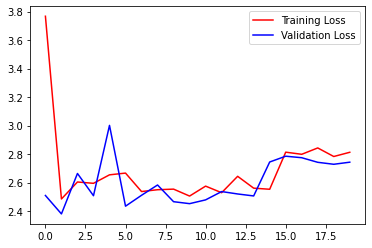

In [46]:
plt.plot(history.history['loss'],color='r',label='Training Loss')
plt.plot(history.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
model1.load_weights('model1.hdf5')

In [48]:
model2 = Sequential()
model2.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model2.add(GRU(64,return_sequences=True))
model2.add(LSTM(64,return_sequences=True))
model2.add(TimeDistributed(Dense(vocab_fr+2)))

model2.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 22, 300)           60600     
_________________________________________________________________
gru_2 (GRU)                  (None, 22, 64)            70080     
_________________________________________________________________
lstm_1 (LSTM)                (None, 22, 64)            33024     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 22, 322)           20930     
Total params: 184,634
Trainable params: 184,634
Non-trainable params: 0
_________________________________________________________________


In [49]:
history1=model2.fit(x=en_pad,y=fr_pad,epochs=20,validation_split=0.1,batch_size=128,callbacks=[mcp_save1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 7s 765us/step - loss: 3.9747 - accuracy: 0.3830 - val_loss: 3.1848 - val_accuracy: 0.3623
Epoch 2/20
9000/9000 [==============================] - 6s 699us/step - loss: 2.7292 - accuracy: 0.4345 - val_loss: 2.9830 - val_accuracy: 0.4600
Epoch 3/20
9000/9000 [==============================] - 6s 694us/step - loss: 2.4908 - accuracy: 0.4810 - val_loss: 2.2596 - val_accuracy: 0.4795
Epoch 4/20
9000/9000 [==============================] - 6s 701us/step - loss: 2.3379 - accuracy: 0.4793 - val_loss: 2.2746 - val_accuracy: 0.4784
Epoch 5/20
9000/9000 [==============================] - 6s 696us/step - loss: 2.8302 - accuracy: 0.4276 - val_loss: 2.9852 - val_accuracy: 0.4389
Epoch 6/20
9000/9000 [==============================] - 6s 704us/step - loss: 2.5668 - accuracy: 0.4770 - val_loss: 2.9328 - val_accuracy: 0.4407
Epoch 7/20
9000/9000 [==============================] - 6s 690us/step - loss

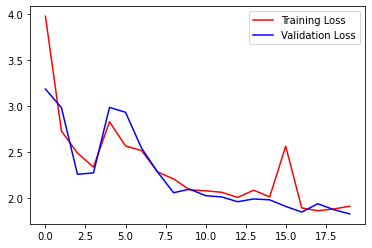

In [50]:
plt.plot(history1.history['loss'],color='r',label='Training Loss')
plt.plot(history1.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
model2.load_weights('model2.hdf5')

In [52]:
model3 = Sequential()
model3.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(LSTM(64,return_sequences=True))
model3.add(Dense(vocab_fr+2))

model3.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 22, 300)           60600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 22, 128)           186880    
_________________________________________________________________
lstm_3 (LSTM)                (None, 22, 64)            49408     
_________________________________________________________________
dense_3 (Dense)              (None, 22, 322)           20930     
Total params: 317,818
Trainable params: 317,818
Non-trainable params: 0
_________________________________________________________________


In [53]:
history2=model3.fit(x=en_pad,y=fr_pad,epochs=20,validation_split=0.1,batch_size=128,callbacks=[mcp_save2])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 9s 984us/step - loss: 3.5524 - accuracy: 0.3898 - val_loss: 2.4978 - val_accuracy: 0.4765
Epoch 2/20
9000/9000 [==============================] - 8s 893us/step - loss: 2.4448 - accuracy: 0.4837 - val_loss: 2.9470 - val_accuracy: 0.3450
Epoch 3/20
9000/9000 [==============================] - 8s 887us/step - loss: 2.8330 - accuracy: 0.3490 - val_loss: 2.4847 - val_accuracy: 0.3975
Epoch 4/20
9000/9000 [==============================] - 8s 894us/step - loss: 2.2047 - accuracy: 0.4777 - val_loss: 2.1345 - val_accuracy: 0.5415
Epoch 5/20
9000/9000 [==============================] - 8s 890us/step - loss: 1.8923 - accuracy: 0.5647 - val_loss: 1.7408 - val_accuracy: 0.5888
Epoch 6/20
9000/9000 [==============================] - 8s 881us/step - loss: 2.2314 - accuracy: 0.4747 - val_loss: 2.2217 - val_accuracy: 0.4465
Epoch 7/20
9000/9000 [==============================] - 8s 909us/step - loss

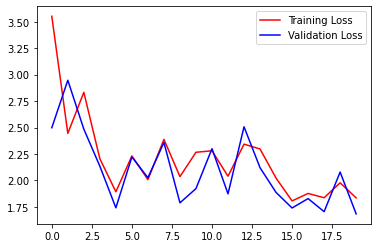

In [54]:
plt.plot(history2.history['loss'],color='r',label='Training Loss')
plt.plot(history2.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
model3.load_weights('model3.hdf5')

In [0]:
encoder_inputs = Input(shape=(22,))
encoder_embedding = Embedding(vocab_en+2,300)(encoder_inputs)
encoder_LSTM = LSTM(300, return_state=True)
encoder_outputs, state_h, state_c = encoder_LSTM(encoder_embedding)

decoder_inputs = Input(shape=(22, ))
decoder_embedding = Embedding(vocab_fr+2,300)(decoder_inputs)
decoder_LSTM = LSTM(300, return_state=True, return_sequences=True)
decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])

# dense_layer = Dense(VOCAB_SIZE, activation='softmax')
outputs = TimeDistributed(Dense(vocab_fr+2, activation='softmax'))(decoder_outputs)
model4 = Model([encoder_inputs, decoder_inputs], outputs)

In [0]:
model4.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model4.summary()

In [0]:
history3=model4.fit([en_pad,fr_pad.reshape(10000,22)],fr_pad,epochs=20,validation_split=0.1,batch_size=128,callbacks=[mcp_save3])

In [0]:
plt.plot(history3.history['loss'],color='r',label='Training Loss')
plt.plot(history3.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
dec= np.zeros((10000,22))
dec.shape

In [0]:
history4=model4.fit([en_pad,dec],fr_pad,epochs=20,validation_split=0.1,batch_size=128,callbacks=[mcp_save4])

In [0]:
plt.plot(history4.history['loss'],color='r',label='Training Loss')
plt.plot(history4.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
model4.load_weights('model5.hdf5')

## Inference Part

In [0]:
last_states_encoder = [state_h, state_c]
inference_encoder_model = Model(input = encoder_inputs, output = last_states_encoder)

In [0]:
decoder_initial_state = [Input(shape = (300,)), Input(shape = (300,))]  
all_hidden_decoder, last_hidden_decoder, last_cell_decoder = decoder_LSTM(decoder_inputs, 
                                                                          initial_state = decoder_initial_state)

decoder_dense = TimeDistributed(Dense(vocab_fr+2, activation='softmax'))
logits = decoder_dense(all_hidden_decoder)

inference_decoder_model = Model(input  = [input_seq_decoder] + decoder_initial_state, 
                                output = [logits, last_hidden_decoder, last_cell_decoder])

In [0]:
model4.load_weights('model4.hdf5')

In [0]:
decoder_state_input_h = Input(shape=(None,))
decoder_state_input_c = Input(shape=(None,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [0]:
decoder_outputs2, state_h2, state_c2 = decoder_LSTM(decoder_embedding, initial_state=decoder_states_inputs)

In [0]:
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = TimeDistributed(Dense(vocab_fr+2, activation='softmax'))(decoder_outputs2)

In [0]:
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

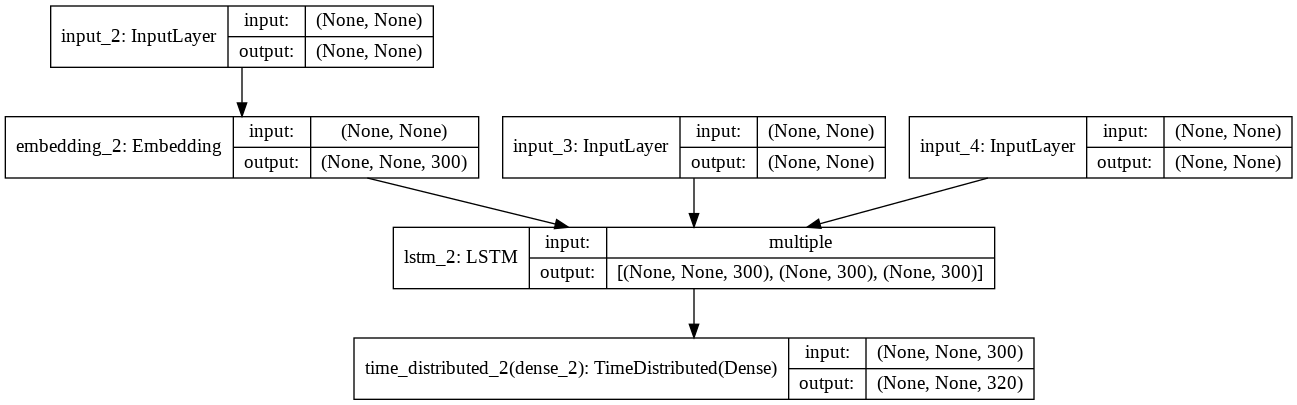

In [0]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [0]:
input_word2idx=token_en.word_index
out_word2idx=token_fr.word_index

In [0]:
idx2word_input = {v:k for k, v in input_word2idx.items()}
idx2word_target = {v:k for k, v in out_word2idx.items()}

In [0]:
idx2word_target['START_']='00'

In [0]:
reverse_target_char_index = dict((i, word) for word, i in idx2word_target.items())

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = idx2word_target['START_']
    
    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char
        
        # Exit condition: either hit max length or find stop token.
        if (sampled_char == '_END' or len(decoded_sentence) > 50):
            stop_condition = True
        
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # Update states
        states_value = [h, c]
    
    return decoded_sentence

In [0]:
i = np.random.choice(len(english_sentences))
input_seq = en_pad[i:i+1]
translation = decode_sequence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

KeyError: ignored

In [0]:
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

TypeError: ignored

In [0]:
type(Embedding(vocab_fr+2,300))

keras.layers.embeddings.Embedding

In [0]:
x=decoder_embedding(decoder_inputs)

TypeError: ignored

In [0]:
latent_dim=300

In [0]:
decoder_hidden_state_inputs = Input(shape=(latent_dim,))
decoder_cell_state_inputs = Input(shape=(latent_dim,))
decoder_state_inputs = [decoder_hidden_state_inputs, decoder_cell_state_inputs]

decoder_lstm_outputs, decoder_hidden_state, decoder_cell_state = decoder_LSTM(inputs=decoder_embedding(decoder_inputs),
                                                                              initial_state=decoder_state_inputs,
    )
decoder_state = [decoder_hidden_state, decoder_cell_state]

decoder_outputs = decoder_dense(inputs=decoder_lstm_outputs)

decoder_model = Model(
    inputs=[decoder_inputs] + decoder_state_inputs,
    outputs=[decoder_dense_outputs] + decoder_state,
)

TypeError: ignored

In [0]:
decoder_output, decoder_hidden_state, decoder_cell_state = decoder_LSTM(inputs=decoder_embedding(decoder_inputs),initial_state=decoder_states_inputs)

TypeError: ignored

In [0]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_hidden_state_inputs = Input(shape=(latent_dim,))
decoder_cell_state_inputs = Input(shape=(latent_dim,))
decoder_state_inputs = [decoder_hidden_state_inputs, decoder_cell_state_inputs]

decoder_lstm_outputs, decoder_hidden_state, decoder_cell_state = decoder_lstm(inputs=decoder_embedding(decoder_inputs),
                                                                              initial_state=decoder_state_inputs,
    )
decoder_state = [decoder_hidden_state, decoder_cell_state]

decoder_outputs = decoder_dense(inputs=decoder_lstm_outputs)

decoder_model = Model(
    inputs=[decoder_inputs] + decoder_state_inputs,
    outputs=[decoder_dense_outputs] + decoder_state,
)

In [0]:
fr_new = fr_pad.reshape(10000,20)

In [0]:
fr_new.shape

(10000, 20)

In [0]:
random = 'SOS i plan to visit france in spring EOS'
random = token_en.texts_to_sequences([random])


In [168]:
random

[[2, 98, 128, 93, 110, 27, 4, 36, 3]]

In [0]:
flat_list = []
for sublist in random:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]


In [0]:
r_pad = pad_sequences(flat_list,maxlen=maxi_fr,padding='post')

In [171]:
r_pad.shape

(1, 22)

In [172]:
r_pad

array([[  2,  98, 128,  93, 110,  27,   4,  36,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [0]:
en_pad[0].reshape(1,-1).shape

(1, 20)

In [0]:
model2.predict(r_pad)[0].shape

(20, 320)

In [173]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [0]:
logits_to_text(model2.predict(en_pad[0].reshape(1,-1)).reshape(22,322), token_fr)

In [185]:
logits_to_text(model3.predict(r_pad)[0], token_fr)

'sos en en en en en en en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

In [188]:
logits_to_text(model4.predict([r_pad,np.zeros((1,22))])[0], token_fr)

'sos paris citrons <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

In [155]:
french_sentences[0],english_sentences[0]

("new jersey est parfois calme pendant l' automne , et il est neigeux en avril .",
 'new jersey is sometimes quiet during autumn , and it is snowy in april .')

In [158]:
model3.predict(r_pad).shape

(1, 22, 322)

In [0]:
index_to_words = {id: word for word, id in token_en.word_index.items()}

In [75]:
french_sentences[0]

"new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."